In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # Deep learning Tensorflow
import matplotlib.pyplot as plt # Plotting module to plot the figures
%matplotlib inline
import seaborn as sns

In [3]:
# we are using the fashion MNIST dataset from Keras dataset
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
#Loading Data into train and test 
(X_train_full,y_train_full),(X_test,y_test) = fmnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

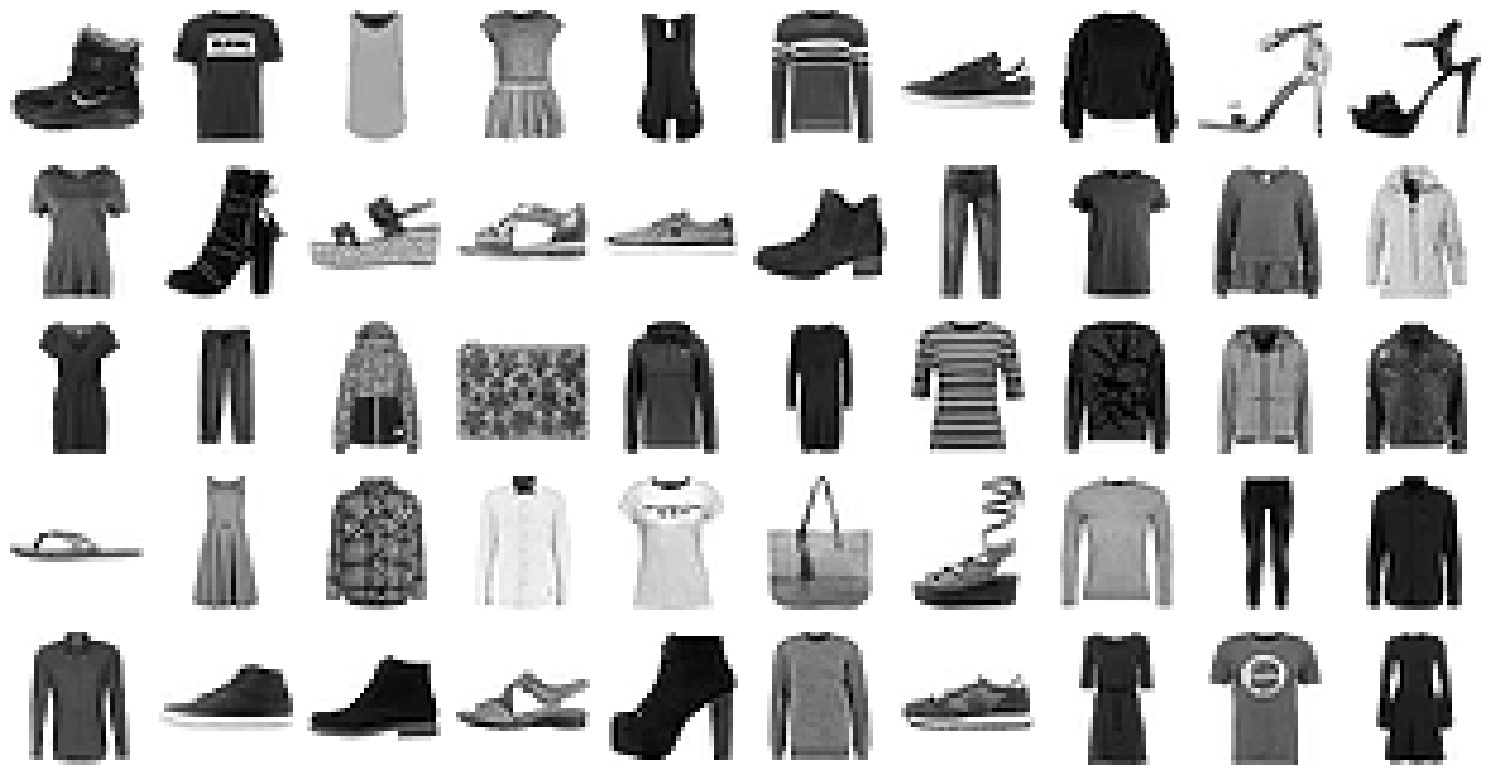

In [8]:
#Lets take a look at sample images
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train_full[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [37]:
#Assigning some images for the validation set
#We divide each value by 255 as color of any image 
#is in the range (0-255)
# Hence all the features are scaled to the range (0-1)
X_vaild,X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_vaild,y_train = y_train_full[:5000],y_train_full[5000:]

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
#Almost all the target classes are equally distributed
np.array(np.unique(y_train, return_counts=True)).T
#Total 10 classes with almost equal values

array([[   0, 5543],
       [   1, 5444],
       [   2, 5496],
       [   3, 5499],
       [   4, 5512],
       [   5, 5507],
       [   6, 5507],
       [   7, 5488],
       [   8, 5510],
       [   9, 5494]], dtype=int64)

In [16]:
#We assign the classes to the target variables
#and they are given below
class_names = ["T-shirt/top" , "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [51]:
class_names[y_train_full[6]]

'Sneaker'

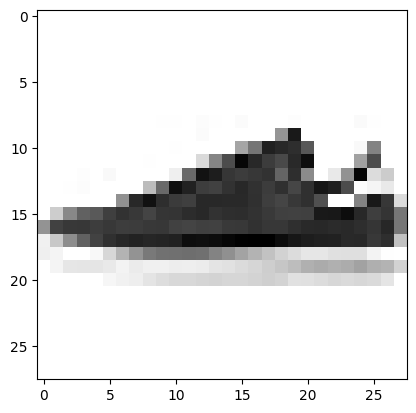

In [21]:
plt.imshow(X_train_full[6].reshape((28,28)),cmap='binary')

In [23]:
import tensorflow as keras

In [29]:
#lets bulit it with 2 hidden layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [31]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [34]:
#Define the CNN Model

model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
#Check the details of the model using below method
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [41]:
#Compile the CNN model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
#Reshape the train data as Keras need 4 dimension for the training data
X_train_full = X_train_full.reshape(60000,28,28,1)

model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2103 - accuracy: 0.9221
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1923 - accuracy: 0.9279
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1753 - accuracy: 0.9350
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1619 - accuracy: 0.9388
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1490 - accuracy: 0.9434
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1358 - accuracy: 0.9484
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1233 - accuracy: 0.9534
Epoch 8/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1130 - accuracy: 0.9572
Epoch 9/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1022 - accuracy: 0.9612
Epoch 10/10
1719/1719 [==============================] - 18s 10ms/step -

In [49]:
#Reshape the test data before evaluation
X_test = X_test.reshape(10000,28,28,1)

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.7689 - accuracy: 0.8156


[62.768924713134766, 0.8155999779701233]